In [84]:
import os
os.getcwd()
import pandas as pd
df = pd.read_csv("/Users/josepeon/Documents/ZEROZERO/scanalyzer/data/simplification_logs.csv")

In [85]:
df.head()

,mesh_name,vertices,triangles,surface_area,volume,watertight,average_edge_length,average_triangle_aspect_ratio,min_curvature,average_curvature,max_curvature,connected_components,approx_thickness,simplification_level
0,test1,12400,24800,452.3,87.4,1,0.025,1.25,-0.5,0.10,1.2,1,4.2,Mild
1,test2,5300,10450,198.2,34.8,0,0.031,1.10,-0.3,0.06,0.8,2,3.1,Aggressive
2,test3,6000,11800,210.5,39.1,1,0.028,1.15,-0.4,0.08,1.0,2,3.7,Moderate
3,test4,4800,9400,175.0,30.4,0,0.030,1.12,-0.2,0.07,0.9,2,2.9,Mild
4,test5,11000,22000,390.0,74.5,1,0.026,1.22,-0.6,0.09,1.3,1,4.1,Aggressive


In [86]:
for col in df.columns:
    if col not in ['mesh_name', 'simplification_level']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [87]:
df.describe()

,vertices,triangles,surface_area,volume,watertight,average_edge_length,average_triangle_aspect_ratio,min_curvature,average_curvature,max_curvature,connected_components,approx_thickness
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,28236.937736,38643.835849,12587.696321,9145.620830,0.754717,2.729845,1.693566,-3.756736,1.144736,3.967604,2.239623,11.304736
std,28480.933776,44418.142022,27383.660020,30067.199094,0.430661,2.993175,0.640930,3.464785,1.263308,4.867733,1.933961,13.855658
min,3000.000000,5800.000000,100.020000,20.500000,0.000000,0.024000,1.000000,-10.000000,0.000000,0.600000,1.000000,0.500000
25%,8600.000000,13900.000000,320.500000,59.000000,1.000000,0.031000,1.160000,-7.540000,0.090000,1.130000,1.000000,2.715000
50%,15725.000000,20158.000000,1390.515000,220.235000,1.000000,2.120000,1.320000,-2.580000,0.610000,2.145000,2.000000,3.700000
75%,41597.000000,36622.500000,6825.140000,3318.242500,1.000000,4.050000,2.190000,-0.500000,1.990000,3.590000,2.000000,14.090000
max,100345.000000,200689.000000,156473.000000,180743.000000,1.000000,10.000000,5.000000,-0.100000,5.000000,20.000000,10.000000,50.000000


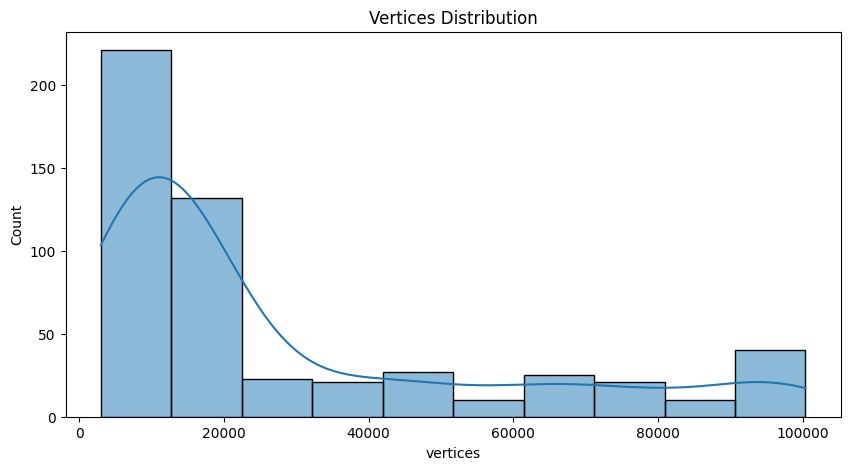

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['vertices'], bins=10, kde=True)
plt.title("Vertices Distribution")
plt.show()

In [89]:
print(df.dtypes)
print(df.select_dtypes(include='number').isna().sum())

mesh_name                         object
vertices                           int64
triangles                          int64
surface_area                     float64
volume                           float64
watertight                         int64
average_edge_length              float64
average_triangle_aspect_ratio    float64
min_curvature                    float64
average_curvature                float64
max_curvature                    float64
connected_components               int64
approx_thickness                 float64
simplification_level              object
dtype: object
vertices                         0
triangles                        0
surface_area                     0
volume                           0
watertight                       0
average_edge_length              0
average_triangle_aspect_ratio    0
min_curvature                    0
average_curvature                0
max_curvature                    0
connected_components             0
approx_thickness           

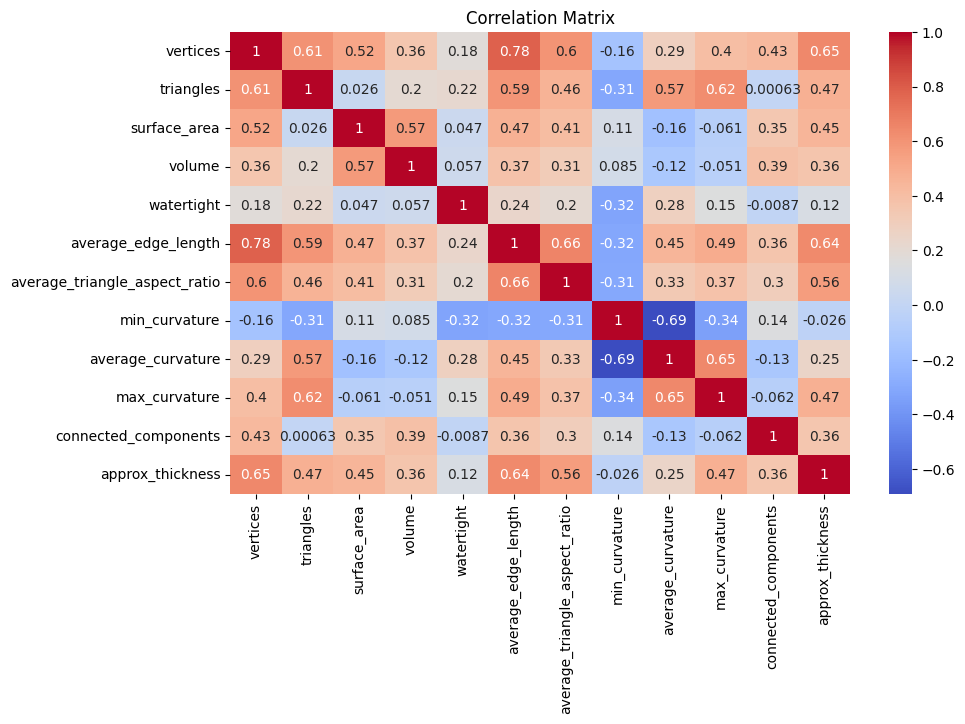

In [90]:
numeric_df = df.select_dtypes(include='number').dropna(axis=1, how='any')  # drop columns with NaN
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")

In [91]:
print(df.dtypes)
print(df.select_dtypes(include='number').isna().sum())

mesh_name                         object
vertices                           int64
triangles                          int64
surface_area                     float64
volume                           float64
watertight                         int64
average_edge_length              float64
average_triangle_aspect_ratio    float64
min_curvature                    float64
average_curvature                float64
max_curvature                    float64
connected_components               int64
approx_thickness                 float64
simplification_level              object
dtype: object
vertices                         0
triangles                        0
surface_area                     0
volume                           0
watertight                       0
average_edge_length              0
average_triangle_aspect_ratio    0
min_curvature                    0
average_curvature                0
max_curvature                    0
connected_components             0
approx_thickness           

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['simplification_level_encoded'] = le.fit_transform(df['simplification_level'])

In [93]:
print(df[['simplification_level', 'simplification_level_encoded']])

    simplification_level  simplification_level_encoded
0                   Mild                             2
1             Aggressive                             0
2               Moderate                             3
3                   Mild                             2
4             Aggressive                             0
..                   ...                           ...
525                 Mild                             2
526           Aggressive                             0
527               Medium                             1
528                 Mild                             2
529           Aggressive                             0

[530 rows x 2 columns]


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features and label
X = df.drop(columns=['mesh_name', 'simplification_level', 'simplification_level_encoded'])
y = df['simplification_level_encoded']

# Drop any rows with NaNs
X = X.dropna()
y = y[X.index]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5377358490566038
              precision    recall  f1-score   support

           0       0.54      0.42      0.47        36
           1       0.75      0.67      0.71        18
           2       0.51      0.70      0.59        33
           3       0.41      0.37      0.39        19

    accuracy                           0.54       106
   macro avg       0.55      0.54      0.54       106
weighted avg       0.54      0.54      0.53       106



In [95]:
df['simplification_level_encoded'].value_counts()

simplification_level_encoded
2    177
0    176
1    110
3     67
Name: count, dtype: int64

In [96]:
importances = clf.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

vertices: 0.0982
triangles: 0.0999
surface_area: 0.1136
volume: 0.1290
watertight: 0.0086
average_edge_length: 0.0769
average_triangle_aspect_ratio: 0.1243
min_curvature: 0.0734
average_curvature: 0.0604
max_curvature: 0.1040
connected_components: 0.0177
approx_thickness: 0.0940


In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.5684580295008824


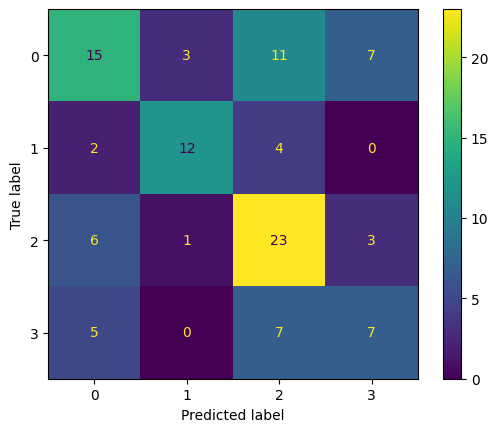

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [99]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Accuracy: 0.5094339622641509
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        36
           1       0.63      0.67      0.65        18
           2       0.53      0.73      0.62        33
           3       0.38      0.26      0.31        19

    accuracy                           0.51       106
   macro avg       0.50      0.50      0.49       106
weighted avg       0.49      0.51      0.49       106



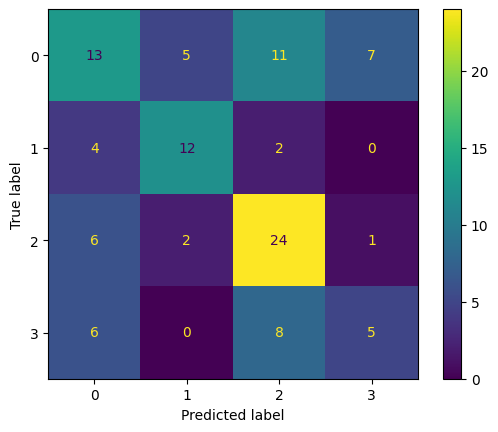

In [100]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

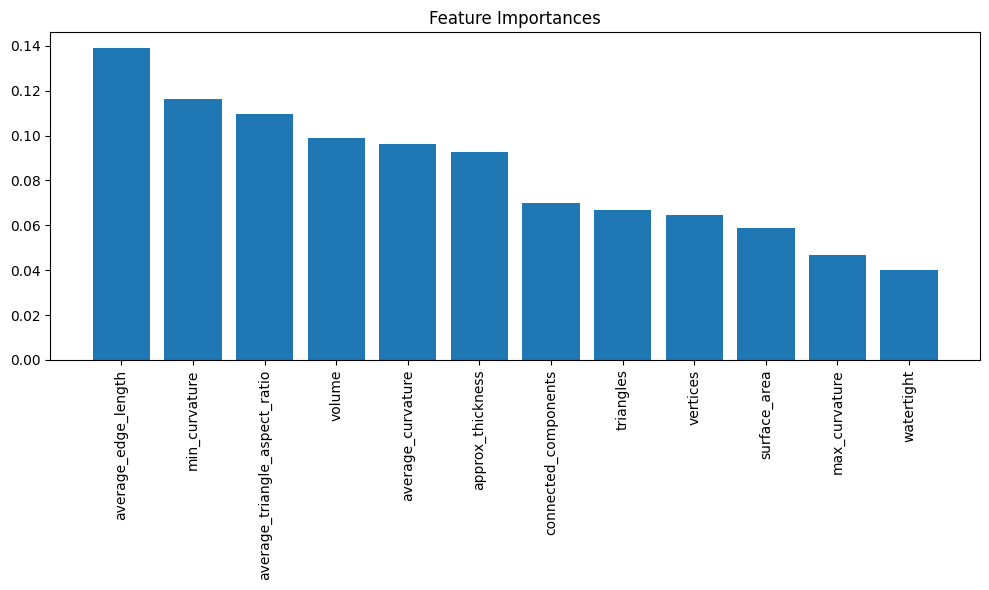

In [101]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [102]:
import joblib

# Create directory if it doesn't exist
os.makedirs('../model', exist_ok=True)

# Save the model
joblib.dump(model, '../model/simplification_model.pkl')

['../model/simplification_model.pkl']